# Project name - Startup Investments

#### The goal of the project is to analyze data on funds and investments and write queries to the database

#### Data is located at the link https://www.kaggle.com/datasets/justinas/startup-investments?select=degrees.csv

### ERD
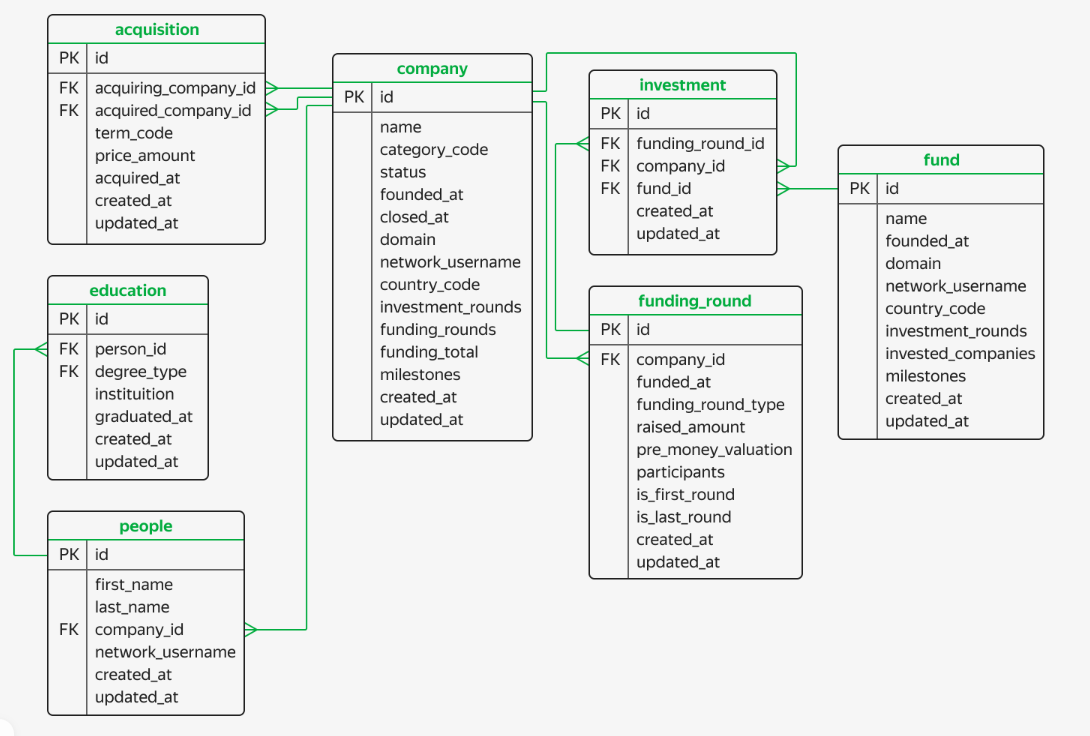

## **Сontent**

### 1. [Data preparation](#0)

### 2. Tasks

### [Task 1](#1)
##### Counting closed companies.

### [Task 2](#2)
##### Display the number of funds raised for US news companies. Use data from the company table. Sort the table in descending order of the values in the funding_total field.

### [Task 3](#3)
##### Display the first name, last name, id of people whose last names begin with 'St'.

### [Task 4](#4)
##### Make a table that includes the date of the round, as well as the minimum and maximum values of the amount of investment raised on this date. Leave in the final table only those records in which the minimum value of the investment amount is not equal to zero and not equal to the maximum value.

### [Task 5](#5)
##### Create a field with categories:
##### For funds that invest in 100 or more companies, assign the category *high_activity*.
##### For funds that invest in 20 or more companies up to 100, assign the *middle_activity* category.
##### If the number of invested fund companies does not reach 20, assign the category *low_activity*.
##### Display all the fields in the fund table and a new category field.

### [Task 6](#6)
##### For each of the categories assigned in the previous task (5), calculate the average number of investment rounds in which the fund participated, rounded to the nearest whole number. Display categories and average number of investment rounds. Sort the table in ascending order of average.

### [Task 7](#7)
##### Analyze in which countries the funds that most often invest in startups are located.
##### For each country, calculate the minimum, maximum and average number of companies in which funds in that country invested, founded from 2005 to 2008 inclusive. Exclude countries with funds whose minimum number of companies receiving investments is zero.
##### Unload the ten most active investing countries: sort the table by average number of companies from largest to smallest. Then add sorting by country code in lexicographical order.

### [Task 8](#8)
##### Create a table of fields:
##### *name_of_fund* — name of the fund;
##### *name_of_company* — company name;
##### Amount is the final investment raised by the company in the round.
##### The table will include data on companies whose history had more than six important stages; funding rounds took place from 2012 to 2013 inclusive.

### [Task 9](#9)
##### Download a table that will include the names of companies from the social category that received funding from 2010 to 2013 inclusive. Check that the investment amount is not zero. Also print the number of the month in which the funding round took place.


<a id="0"></a> <br>
#### **Data preparation**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# install translation from cvs to sqlite
!pip install csv-to-sqlite

In [ ]:
# import libraries
import csv_to_sqlite
import sqlite3
import csv

In [ ]:
# downlaud dataframes
funding_round = pd.read_csv("/kaggle/input/startup-investments/funding_rounds.csv", low_memory=False)
acquisition = pd.read_csv("/kaggle/input/startup-investments/acquisitions.csv", low_memory=False)
company = pd.read_csv("/kaggle/input/startup-investments/objects.csv", low_memory=False)
people = pd.read_csv("/kaggle/input/startup-investments/people.csv", low_memory=False)
education = pd.read_csv("/kaggle/input/startup-investments/degrees.csv", low_memory=False)
investment = pd.read_csv("/kaggle/input/startup-investments/investments.csv", low_memory=False)
fund = pd.read_csv("/kaggle/input/startup-investments/funds.csv", low_memory=False)


In [ ]:
# bringing dataframe formats to csv 
funding_round.to_csv('funding_round.csv', index=False)
acquisition.to_csv('acquisition.csv', index=False)
company.to_csv('company.csv', index=False)
people.to_csv('people.csv', index=False)
education.to_csv('education.csv', index=False)
investment.to_csv('investment.csv', index=False)
fund.to_csv('fund.csv', index=False)

In [ ]:
# translating dataframe formarts from csv to sqlite
options=csv_to_sqlite.CsvOptions(typing_style='full',encoding='utf-8')
input_name = ['funding_round.csv', 'acquisition.csv', 
              'company.csv', 'people.csv', 'education.csv',
              'investment.csv', 'fund.csv']
database_name = 'output.sqlite'
if os.path.exists(database_name):
    os.remove(database_name)
csv_to_sqlite.write_csv(input_name, database_name, options)

<a id="1"></a> <br>
#### **Task 1.**

In [ ]:
# counting company with status 'closed'
con=sqlite3.connect('output.sqlite')
count_closed = pd.read_sql_query('''SELECT COUNT(name)
                         FROM company
                         WHERE status='closed';''',con)
count_closed

<a id="1"></a> <br>
#### **Task 2.**

In [ ]:
# display total funds raised for US news companies
found_total_for_news_comp = pd.read_sql_query('''SELECT SUM(funding_total_usd)
                                                 FROM company
                                                 WHERE category_code='news'
                                                 AND country_code='USA'
                                                 GROUP BY name
                                                 ORDER BY SUM(funding_total_usd) DESC;''',
                                              con)
found_total_for_news_comp

<a id="1"></a> <br>
#### **Task 3.**

In [ ]:
# display imformation about people witn last name start 'St'
name_with_St = pd.read_sql_query ('''SELECT first_name,
                                    last_name,
                                    id
                                    FROM people
                                    WHERE last_name LIKE 'St%';''',
                                    con)
name_with_St

<a id="1"></a> <br>
#### **Task 4.**

In [ ]:
# table with date of round, min and max values of investment raised on this date.
min_max_invest = pd.read_sql_query ('''SELECT funded_at,
                                       MIN(raised_amount) AS minimum,
                                       MAX(raised_amount) AS maximum
                                       FROM funding_round
                                       GROUP BY funded_at
                                       HAVING (MIN(raised_amount)!=0
                                       AND MIN(raised_amount)!=MAX(raised_amount));''',
                                    con)
min_max_invest

<a id="1"></a> <br>
#### **Task 5.**

In [ ]:
# founds categories
found_cat = pd.read_sql_query ('''SELECT *,
                                       CASE
                                       WHEN invested_companies>=100 THEN 'high_activity'
                                       WHEN invested_companies BETWEEN 20 AND 100 THEN 'middle_activity'
                                       WHEN invested_companies<20 THEN 'low_activity'
                                       END
                                       FROM company;''',
                                    con)
found_cat.head(5)

<a id="1"></a> <br>
#### **Task 6.**

In [ ]:
# average number of investment rounds for each category
average_found_cat = pd.read_sql_query ('''SELECT ROUND(AVG(investment_rounds)),
                                  CASE
                                  WHEN invested_companies>=100 THEN 'high_activity'
                                  WHEN invested_companies>=20 THEN 'middle_activity'
                                  ELSE 'low_activity'
                                  END AS activity
                                  FROM company
                                  GROUP BY activity
                                  ORDER BY AVG(investment_rounds);''',
                                    con)
average_found_cat.head(5)

<a id="1"></a> <br>
#### **Task 7.**

In [ ]:
# ten most active investing countries:
ten_invest_countries = pd.read_sql_query(
'''SELECT country_code,
MIN(invested_companies),
MAX(invested_companies),
AVG(invested_companies)
FROM (SELECT *,
STRFTIME('%Y', founded_at) AS founded_year
FROM company
WHERE founded_year BETWEEN '2005' AND '2008') AS f
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY AVG(invested_companies) DESC
LIMIT 10;''',
    con)
ten_invest_countries

<a id="1"></a> <br>
#### **Task 8.**

In [ ]:
# company information with more then 6 funding rounds
comp_six_round = pd.read_sql_query('''SELECT f.name AS name_of_fund,
                                      c.name AS name_of_company,
                                      fr.raised_amount AS amount
                                      FROM investment AS i
                                      LEFT JOIN
                                      (SELECT *
                                      FROM company
                                      WHERE milestones > 6)
                                      AS c ON i.funded_object_id=c.id
                                      LEFT JOIN fund AS f ON i.investor_object_id=f.id
                                      INNER JOIN 
                                      (SELECT *
                                      FROM funding_round AS fr
                                      WHERE funded_at BETWEEN '2005-08-01' AND '2008-08-31')
                                      AS fr ON fr.id = i.funding_round_id
                                      ;''',
                                       con)
comp_six_round

<a id="1"></a> <br>
#### **Task 9.**

In [ ]:
# table with companies name with status is a 'social'
comp_social = pd.read_sql_query('''SELECT c.name,
                                STRFTIME('%m', founded_at) AS founded_month
                                FROM company AS c
                                LEFT JOIN
                                (SELECT *
                                FROM funding_round AS fr
                                WHERE raised_amount !=0) AS fr ON c.id=fr.object_id
                                WHERE category_code='social'
                                AND STRFTIME('%Y', founded_at) BETWEEN '2010' AND '2013';''',
                                con)
comp_social